# Problem Statement:
Predicting temperature of the Permanent Magnet Synchronous pmsm(PMSM) given other
sensor measurements during operation..

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Import Data

In [2]:
pmsm = pd.read_csv("/home/a/Desktop/lib/temperature_data.csv")

pmsm

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


##### creating sample data to try various combinations

In [3]:
pmsm_sampled = pmsm.sample(n=100000, random_state=12, )

In [4]:
x_sample = pmsm_sampled.drop(labels=["pm","profile_id"], axis=1)
y_sample = pmsm_sampled["pm"]

In [5]:
from sklearn.model_selection import train_test_split

x_train_sample, x_test_sample, y_train_sample, y_test_sample = train_test_split(x_sample, y_sample, test_size=.20, random_state=12)

##### build sample model

In [6]:
import tensorflow as tf
from tensorflow import keras

2022-03-09 18:29:48.397222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-09 18:29:48.397291: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [19]:
nn_model_sample = keras.models.Sequential([
                        keras.layers.Dense(units=120, input_dim = 11, activation = "relu"),
#                         keras.layers.Dropout(0.05),
    
                        keras.layers.Dense(units=100, activation = "relu"),
#                         keras.layers.Dropout(0.05),
    
                        keras.layers.Dense(units=120, activation = "relu"),
#                         keras.layers.Dropout(0.05),
    
    
                        keras.layers.Dense(units=1, activation = "linear"),
                        
])

nn_model_sample.compile(optimizer="adam",
                 loss = "mse",
                 metrics=["mse","mae"])

In [21]:
history_sample = nn_model_sample.fit(x = x_train_sample, y=y_train_sample, epochs=10,  validation_split=0.3)

Epoch 1/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0885 - mse: 0.0885 - mae: 0.2161 - val_loss: 0.0915 - val_mse: 0.0915 - val_mae: 0.2215
Epoch 2/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0824 - mse: 0.0824 - mae: 0.2078 - val_loss: 0.0820 - val_mse: 0.0820 - val_mae: 0.2083
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0791 - mse: 0.0791 - mae: 0.2032 - val_loss: 0.0770 - val_mse: 0.0770 - val_mae: 0.1994
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0752 - mse: 0.0752 - mae: 0.1982 - val_loss: 0.0731 - val_mse: 0.0731 - val_mae: 0.1916
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0707 - mse: 0.0707 - mae: 0.1909 - val_loss: 0.0784 - val_mse: 0.0784 - val_mae: 0.2087
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0669 - mse: 0.0669 - mae: 0.1859 - val_loss: 0.0680 - val_mse: 0.0680 - val_mae: 0.1893
Epoc

In [23]:
nn_model_sample.evaluate(x_test_sample, y_test_sample)

625/625 [==============================] - 1s 2ms/step - loss: 0.0622 - mse: 0.0622 - mae: 0.1787


[0.06221034377813339, 0.06221034377813339, 0.17868542671203613]

In [25]:
history_sample.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

##### Plot of mse with eposch

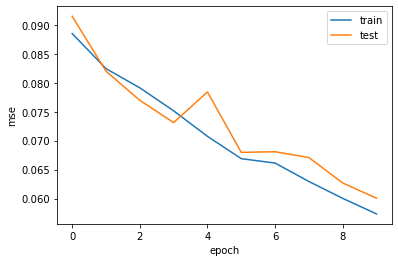

In [28]:
plt.xlabel("epoch")
plt.ylabel("mse")
plt.plot(history_sample.epoch, history_sample.history["mse"] )
plt.plot(history_sample.epoch, history_sample.history["val_mse"] )
plt.legend(["train", "test"])
plt.show()

In [29]:
y_test_pred_sample = nn_model_sample.predict(x_test_sample)

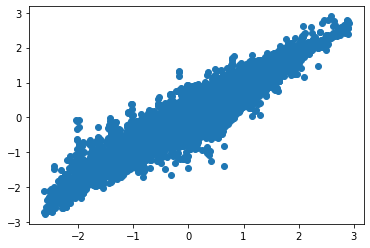

In [31]:
plt.scatter(y_test_sample, y_test_pred_sample)
plt.show()

## Build model for whole data

In [37]:
x = pmsm.drop(labels=["pm","profile_id"], axis=1)
y = pmsm["pm"]

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=.20, random_state=12)

##### build full model

In [42]:
nn_model_full = keras.models.Sequential([
                        keras.layers.Dense(units=120, input_dim = 11, activation = "relu"),
#                         keras.layers.Dropout(0.05),
    
                        keras.layers.Dense(units=100, activation = "relu"),
#                         keras.layers.Dropout(0.05),
    
                        keras.layers.Dense(units=120, activation = "relu"),
#                         keras.layers.Dropout(0.05),
    
    
                        keras.layers.Dense(units=1, activation = "linear"),
                        
])

nn_model_full.compile(optimizer="adam",
                 loss = "mse",
                 metrics=["mse","mae"])

In [47]:
history_full = nn_model_full.fit(x = x_train, y=y_train, epochs=10,  validation_split=0.3)

Epoch 1/10
17467/17467 [==============================] - 51s 3ms/step - loss: 0.0624 - mse: 0.0624 - mae: 0.1781 - val_loss: 0.0499 - val_mse: 0.0499 - val_mae: 0.1568
Epoch 2/10
17467/17467 [==============================] - 50s 3ms/step - loss: 0.0496 - mse: 0.0496 - mae: 0.1576 - val_loss: 0.0530 - val_mse: 0.0530 - val_mae: 0.1660
Epoch 3/10
17467/17467 [==============================] - 52s 3ms/step - loss: 0.0426 - mse: 0.0426 - mae: 0.1455 - val_loss: 0.0424 - val_mse: 0.0424 - val_mae: 0.1457
Epoch 4/10
17467/17467 [==============================] - 52s 3ms/step - loss: 0.0375 - mse: 0.0375 - mae: 0.1362 - val_loss: 0.0383 - val_mse: 0.0383 - val_mae: 0.1396
Epoch 5/10
17467/17467 [==============================] - 51s 3ms/step - loss: 0.0340 - mse: 0.0340 - mae: 0.1294 - val_loss: 0.0341 - val_mse: 0.0341 - val_mae: 0.1278
Epoch 6/10
17467/17467 [==============================] - 51s 3ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1243 - val_loss: 0.0297 - val_mse: 0.0297 - va

In [48]:
nn_model_full.evaluate(x_test, y_test)

6238/6238 [==============================] - 11s 2ms/step - loss: 0.0215 - mse: 0.0215 - mae: 0.1003


[0.021516771987080574, 0.021516771987080574, 0.10029084980487823]

In [ ]:
mean_absolute_error(x_train, )

In [51]:
history_full.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

##### Plot of mse with eposch

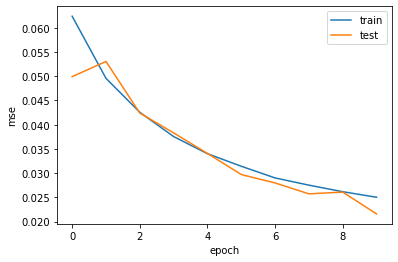

In [52]:
plt.xlabel("epoch")
plt.ylabel("mse")
plt.plot(history_full.epoch, history_full.history["mse"] )
plt.plot(history_full.epoch, history_full.history["val_mse"] )
plt.legend(["train", "test"])
plt.show()

In [59]:
y_test_pred_full  = nn_model_full.predict(x_test)

y_train_pred_full = nn_model_full.predict(x_train)


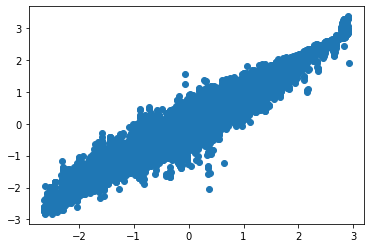

In [58]:

plt.scatter(y_test, y_test_pred_full)
plt.show()

In [60]:
mean_squared_error(y_train, y_train_pred_full)

0.020901114953653002

In [61]:
mean_absolute_error(y_train, y_train_pred_full)

0.09922228114911585